In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pickle

In [280]:
df = pd.read_csv(r"csv files\medical_insurance.csv")

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [231]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [232]:
ohe = LabelEncoder()

In [233]:
arr = ohe.fit_transform(df["sex"])

In [234]:
df["sex"] = arr

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 68.1+ KB


In [236]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [237]:
arr2 = ohe.fit_transform(df["smoker"])

In [238]:
df["smoker"] = arr2

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [240]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [241]:
lbl = LabelEncoder()

In [242]:
arr3 = lbl.fit_transform(df[["region"]])

c:\users\ugc\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [243]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [244]:
df["region"] = arr3

In [245]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:xlabel='age'>

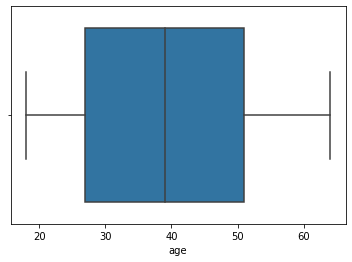

In [246]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='bmi'>

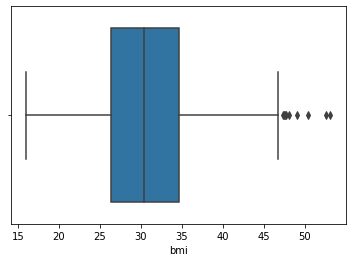

In [247]:
sns.boxplot(x=df["bmi"])



<AxesSubplot:xlabel='bmi', ylabel='Density'>

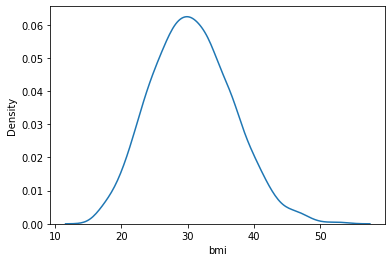

In [248]:
sns.kdeplot(df["bmi"])

## train test split

In [249]:
x = df.drop("charges",axis=1)
y =df["charges"]

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

## linear model

In [251]:
model = LinearRegression()

In [252]:
model.fit(x_train,y_train)

LinearRegression()

In [253]:
y_pred = model.predict(x_test)

In [254]:
r2=r2_score(y_test,y_pred)

In [255]:
r2

0.7574825064531082

## decision tree model

In [256]:
dt_model = DecisionTreeRegressor()

In [257]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [258]:
dt_y_pred = dt_model.predict(x_test)

In [259]:
dt_r2=r2_score(y_test,dt_y_pred)

In [260]:
dt_r2

0.7425508223905448

In [261]:
dt_y_pred_train = dt_model.predict(x_train)

In [262]:
dt_r2train=r2_score(y_train,dt_y_pred_train)

In [263]:
dt_r2train

1.0

## with hyperparameters

In [264]:
dt_hyp ={'max_depth': np.arange(1,8),
        'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(2,15)}

In [265]:
rsdt = RandomizedSearchCV(dt_model,dt_hyp,random_state=10)

In [266]:
rsdt.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=10)

In [267]:
rsdt.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=13, min_samples_split=17)

In [270]:
dt_with_hyp = DecisionTreeRegressor(max_depth=5, min_samples_leaf=13, min_samples_split=17)
dt_with_hyp.fit(x_train,y_train)
dt_hyp_y_pred=dt_with_hyp.predict(x_test)
dt_hyp_r2 = r2_score(y_test,dt_hyp_y_pred)

In [271]:
dt_hyp_r2

0.8816346355566302

In [221]:

dt_hyp_r2_train

0.8488134371741024

In [272]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [273]:
age =19
sex ='male'
bmi = 33
children = 2
smoker= 'yes'
region ='southeast'

In [274]:
sex_values={'male':1,'female':0}
smoker_values = {'yes':1,'no':0}
region_values ={'southeast':1,'southwest':2,'northeast':3,'northwest':4}

In [275]:
array = np.zeros(x.shape[1],dtype =int)
array[0]=age
array[1]=sex_values[sex]
array[2]=bmi
array[3]=children
array[4]=smoker_values[smoker]
array[5]=region_values[region]

In [277]:
model.predict([array])

c:\users\ugc\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28621.48895365])

In [278]:
dt_with_hyp.predict([array])

c:\users\ugc\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([34950.57416])

In [279]:
with open('dt_with_hyp.pkl','wb') as f:
    pickle.dump(dt_with_hyp,f)